# The Battle of Neighboroughs - Part 1

## Background of the Business Problem

Milan, a metropolis in Italy's northern Lombardy region, is a global capital of fashion and design. Home to the national stock exchange, it’s a financial hub also known for its high-end restaurants and shops. Milan is definitely one of the best places to start up a new business.
During the daytime, specially in the morning and lunch hours, office areas provide huge opportunities for coffee shops. Reasonably priced shops are usually always full during the lunch hours (11 am — 2 pm) and, given this scenario, we will go through the benefits and pitfalls of opening a breakfast cum lunch coffee shop in highly densed office places. 
The core of Milano is made of 9 municipalities but, I will later concentrate on 4 most busiest business boroughs of Milan: Centro Storico, Stazione Centrale, Città Studi and Porta Garibaldi to target daily office workers.
We will go through each step of this project and address them separately. I first outline the initial data preparation and describe future steps to start the battle of neighborhoods in Milan


## Preparation for Data (Data Section)

Importing Libraries

In [102]:
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

### Get table of municipalities of Milan from Wikipedia page

We use BeautifulSoup library for scraping the web page

In [103]:
response = requests.get('https://en.wikipedia.org/wiki/Zones_of_Milan').text
soup = BeautifulSoup(response,'lxml')
table = soup.find('table', {'class':'wikitable sortable'})

In [104]:
table_rows = table.find_all('tr')

res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)


df = pd.DataFrame(res, columns=["Id", "Description", "Area", "Population","Density", "Districts"])
#remove column Districts
df = df.drop(columns=['Districts'])
df

,Id,Description,Area,Population,Density
0,1,Centro storico,9.67,"96,315","11,074"
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153.109,"13,031"
2,3,"Città Studi, Lambrate, Porta Venezia",14.23,"141,229","10,785"
3,4,"Porta Vittoria, Forlanini",20.95,156.369,"8,069"
4,5,"Vigentino, Chiaravalle, Gratosoglio",29.87,"123,779","4,487"
5,6,"Barona, Lorenteggio",18.28,"149,000","8,998"
6,7,"Baggio, De Angeli, San Siro",31.34,"170,814","6,093"
7,8,"Fiera, Gallaratese, Quarto Oggiaro",23.72,"181,669","8,326"
8,9,"Porta Garibaldi, Niguarda",21.12,"181,598","9,204"


Remove columns not used

In [105]:
#we assume the first name found in Description as name of Municipality
df['Name'] = df.Description.str.split(',').str[0]
# convert Shortname in Capital letters  
df['Name'] = df.Name.str.capitalize() 

In [106]:
df

,Id,Description,Area,Population,Density,Name
0,1,Centro storico,9.67,"96,315","11,074",Centro storico
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153.109,"13,031",Stazione centrale
2,3,"Città Studi, Lambrate, Porta Venezia",14.23,"141,229","10,785",Città studi
3,4,"Porta Vittoria, Forlanini",20.95,156.369,"8,069",Porta vittoria
4,5,"Vigentino, Chiaravalle, Gratosoglio",29.87,"123,779","4,487",Vigentino
5,6,"Barona, Lorenteggio",18.28,"149,000","8,998",Barona
6,7,"Baggio, De Angeli, San Siro",31.34,"170,814","6,093",Baggio
7,8,"Fiera, Gallaratese, Quarto Oggiaro",23.72,"181,669","8,326",Fiera
8,9,"Porta Garibaldi, Niguarda",21.12,"181,598","9,204",Porta garibaldi


### Get geo coordinates of boroughs

We use Geopy web service

In [107]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Milano, MI, Lom, Italia")
address = []
coord = []
address = "Municipio "+ df['Id']+", Milano, MI, Lom, Italy"
coord = address.apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df['Coordinates'] = coord
df

,Id,Description,Area,Population,Density,Name,Coordinates
0,1,Centro storico,9.67,"96,315","11,074",Centro storico,"(45.4672806, 9.18596201012092)"
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153.109,"13,031",Stazione centrale,"(45.4999899, 9.21899862605208)"
2,3,"Città Studi, Lambrate, Porta Venezia",14.23,"141,229","10,785",Città studi,"(45.4897995, 9.24103088613553)"
3,4,"Porta Vittoria, Forlanini",20.95,156.369,"8,069",Porta vittoria,"(45.446205, 9.23934326456628)"
4,5,"Vigentino, Chiaravalle, Gratosoglio",29.87,"123,779","4,487",Vigentino,"(45.4198458, 9.19815254935277)"
5,6,"Barona, Lorenteggio",18.28,"149,000","8,998",Barona,"(45.43792895, 9.1456481512419)"
6,7,"Baggio, De Angeli, San Siro",31.34,"170,814","6,093",Baggio,"(45.469598, 9.11475732032285)"
7,8,"Fiera, Gallaratese, Quarto Oggiaro",23.72,"181,669","8,326",Fiera,"(45.50001535, 9.12277422514706)"
8,9,"Porta Garibaldi, Niguarda",21.12,"181,598","9,204",Porta garibaldi,"(45.5077041, 9.17941004494827)"


In [108]:
df[['Latitude', 'Longitude']] = df['Coordinates'].apply(pd.Series)

In [109]:
df = df.drop(columns=['Coordinates'])

In [110]:
df

,Id,Description,Area,Population,Density,Name,Latitude,Longitude
0,1,Centro storico,9.67,"96,315","11,074",Centro storico,45.467281,9.185962
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153.109,"13,031",Stazione centrale,45.499990,9.218999
2,3,"Città Studi, Lambrate, Porta Venezia",14.23,"141,229","10,785",Città studi,45.489799,9.241031
3,4,"Porta Vittoria, Forlanini",20.95,156.369,"8,069",Porta vittoria,45.446205,9.239343
4,5,"Vigentino, Chiaravalle, Gratosoglio",29.87,"123,779","4,487",Vigentino,45.419846,9.198153
5,6,"Barona, Lorenteggio",18.28,"149,000","8,998",Barona,45.437929,9.145648
6,7,"Baggio, De Angeli, San Siro",31.34,"170,814","6,093",Baggio,45.469598,9.114757
7,8,"Fiera, Gallaratese, Quarto Oggiaro",23.72,"181,669","8,326",Fiera,45.500015,9.122774
8,9,"Porta Garibaldi, Niguarda",21.12,"181,598","9,204",Porta garibaldi,45.507704,9.179410


In [111]:
df2 = df.loc[df['Name'].isin(["Centro storico", "Stazione centrale", "Città studi", "Porta garibaldi"])]

In [112]:
df2 = df2.reset_index(drop=True)
df2

,Id,Description,Area,Population,Density,Name,Latitude,Longitude
0,1,Centro storico,9.67,"96,315","11,074",Centro storico,45.467281,9.185962
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153.109,"13,031",Stazione centrale,45.499990,9.218999
2,3,"Città Studi, Lambrate, Porta Venezia",14.23,"141,229","10,785",Città studi,45.489799,9.241031
3,9,"Porta Garibaldi, Niguarda",21.12,"181,598","9,204",Porta garibaldi,45.507704,9.179410


### Get average of property price in major municipalities

We get data from page "Mercato Immobiliare a Milano" by using web scraping technique.

In [113]:
response2 = requests.get('https://www.mercato-immobiliare.info/lombardia/milano/milano.html').text
#soup2 = BeautifulSoup(response2,'lxml')
soup2 = BeautifulSoup(response2, 'html.parser')
table2 = soup2.find('table', {'id':'childrentable'})

In [114]:
table_rows2 = table2.find_all('tr')

res = []
for tr in table_rows2:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)


df_price = pd.DataFrame(res, columns=["Name", "Price","Link"])
df_price = df_price.drop(columns=['Link'])

In [115]:
df_price['Name'] = df_price.Name.str.capitalize() 

In [116]:
df_price

,Name,Price
0,Adriano,€ 2.550 /m²
1,Affori,€ 2.250 /m²
2,Baggio,€ 2.250 /m²
3,Barona,€ 2.850 /m²
4,Bicocca,€ 2.700 /m²
5,Bocconi,€ 4.950 /m²
6,Bovisa,€ 2.350 /m²
7,Bovisasca,€ 1.950 /m²
8,Brera,€ 7.000 /m²
9,Bruzzano,€ 2.000 /m²


We select only data for the major municipalities: Centro Storico, Stazione Centrale, Città Studi and Porta Garibaldi.


In [117]:
df_price = df_price.loc[df_price['Name'].isin(["Centro storico", "Stazione centrale", "Città studi", "Porta garibaldi"])]
df_price = df_price.reset_index(drop=True)
df_price

,Name,Price
0,Centro storico,€ 6.550 /m²
1,Città studi,€ 3.950 /m²
2,Porta garibaldi,€ 5.550 /m²
3,Stazione centrale,€ 4.600 /m²


### Join the datasets

In [118]:
df_top4 = pd.merge(df2, df_price, on='Name', how='inner')

In [119]:
df_top4

,Id,Description,Area,Population,Density,Name,Latitude,Longitude,Price
0,1,Centro storico,9.67,"96,315","11,074",Centro storico,45.467281,9.185962,€ 6.550 /m²
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153.109,"13,031",Stazione centrale,45.499990,9.218999,€ 4.600 /m²
2,3,"Città Studi, Lambrate, Porta Venezia",14.23,"141,229","10,785",Città studi,45.489799,9.241031,€ 3.950 /m²
3,9,"Porta Garibaldi, Niguarda",21.12,"181,598","9,204",Porta garibaldi,45.507704,9.179410,€ 5.550 /m²


## Conclusion
### Part 1: Description of Problem and Data Preparation

We get the Initial Data-Frame with Names of Major Municipalities, and corresponding coordinates of those major districts and average proerty price. Before comparing all the municipalities, since we want to concentrate only on lunch coffee shops targeting the office workers, we need to get the idea about the best business areas in Milan. 
Here we want to concentrate on the best four boroughs:

    Centro storico
    Stazione Centrale
    Città Studi
    Porta Garibaldi
    
So as the next step we will use Foursquare data and obtain information on coffee shops. With these, we can start with our battle of neighborhoods for opening a coffee shop in Milan.


In [120]:
# get Milan Latitude and Longitude 

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Milan, MI, Lom, Italy'

geolocator = Nominatim(user_agent="Milan_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Milan are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Milan are 45.4667971, 9.1904984.


In [121]:
!pip install folium

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [122]:
import folium
# create map of busiest office areas in Milan using latitude and longitude values
# default map using Milan coordinates
MilanTop4 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map for each municipality
for lat, lng, label in zip(df3['Latitude'], df3['Longitude'], df3['Shortname']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(MilanTop4)  

MilanTop4


## Access Foursquare API

In [123]:
CLIENT_ID = 'ALFCXANCSQUMZZTOMEXEUNIX4GVF5OSWGUFQE11Y3DELBJKT'
CLIENT_SECRET = 'HDLGHOGJN2WUAQLPU1WGVWSDQP4REHQ4RWCOZAL0YAPCLAWF'
VERSION = '20190325'

### Exploring the Major Districts

1. Create the get request url (using Foursquare ID and Secret) and get 100 venues in the radious of 2 KM
2. Create a json from the request object (Need requests Module) 
3. Create the lists Containing all the information 
4. From the lists create the dataframe.

In [124]:
radius = 2500
LIMIT = 500

def getNearbyVenues(names, latitudes, longitudes, radius=2500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)


In [125]:
MilanTop4_Venues = getNearbyVenues(names=df_top4['Name'],
                                   latitudes=df_top4['Latitude'],
                                   longitudes=df_top4['Longitude']
                                  )

Centro storico
Stazione centrale
Città studi
Porta garibaldi


In [126]:
print ("Shape of the Venues Dataframe: ", MilanTop4_Venues.shape)
MilanTop4_Venues.tail(100)


Shape of the Venues Dataframe:  (400, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
300,Porta garibaldi,45.507704,9.17941,Virgin Active,45.502018,9.182590,Gym / Fitness Center
301,Porta garibaldi,45.507704,9.17941,Al Paradiso Della Pizza,45.511351,9.175416,Pizza Place
302,Porta garibaldi,45.507704,9.17941,Birrificio La Ribalta,45.507038,9.173219,Brewery
303,Porta garibaldi,45.507704,9.17941,Istanbul Kebab,45.510421,9.176128,Kebab Restaurant
304,Porta garibaldi,45.507704,9.17941,Esselunga,45.512380,9.173461,Supermarket
305,Porta garibaldi,45.507704,9.17941,Total Natural Training,45.509142,9.194221,Gym
306,Porta garibaldi,45.507704,9.17941,Spirit de Milan,45.506678,9.159744,Ballroom
307,Porta garibaldi,45.507704,9.17941,Il Bucatino con Giardino,45.502088,9.165959,Italian Restaurant
308,Porta garibaldi,45.507704,9.17941,Sushi Ran,45.500348,9.170942,Japanese Restaurant
309,Porta garibaldi,45.507704,9.17941,Hotel La Residenza,45.512413,9.178770,Hotel


In [127]:
print('unique categories: {}'.format(len(MilanTop4_Venues['Venue_Category'].unique())))
print (MilanTop4_Venues['Venue_Category'].value_counts())

unique categories: 109
Italian Restaurant                          43
Pizza Place                                 26
Ice Cream Shop                              20
Hotel                                       19
Café                                        12
Plaza                                       11
Dessert Shop                                11
Chinese Restaurant                          11
Japanese Restaurant                          9
Trattoria/Osteria                            9
Cocktail Bar                                 9
Restaurant                                   8
Boutique                                     8
Bakery                                       7
Theater                                      7
Sandwich Place                               7
Pub                                          7
Park                                         7
Wine Bar                                     6
Sushi Restaurant                             6
Bar                                  

Now we select only the venies categories which are similar and related to a coffee shop. So the select only categories containing the string "Cof", "Caf", "Bar".

In [128]:
# Create a Data-Frame out of it to Concentrate Only on Coffee Shops 
MilanTop4_Cafe = MilanTop4_Venues[MilanTop4_Venues['Venue_Category'].str.contains('Caf|Cof|Bar')].reset_index(drop=True)
MilanTop4_Cafe.index = np.arange(1, len(MilanTop4_Cafe)+1)
print ('Shape of the Data-Frame with Venue Category Cafe: ', MilanTop4_Cafe.shape)
MilanTop4_Cafe.head(100)

Shape of the Data-Frame with Venue Category Cafe:  (45, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
1,Centro storico,45.467281,9.185962,Starbucks Reserve Roastery,45.464920,9.186153,Coffee Shop
2,Centro storico,45.467281,9.185962,Signorvino,45.467243,9.183567,Wine Bar
3,Centro storico,45.467281,9.185962,Bulgari Lounge Bar,45.470014,9.188943,Cocktail Bar
4,Centro storico,45.467281,9.185962,Lavazza Coffee Design,45.466274,9.190975,Coffee Shop
5,Centro storico,45.467281,9.185962,B Café,45.462640,9.183381,Café
6,Centro storico,45.467281,9.185962,Signorvino,45.464552,9.192885,Wine Bar
7,Centro storico,45.467281,9.185962,Armani Bamboo Bar,45.470483,9.192785,Cocktail Bar
8,Centro storico,45.467281,9.185962,Chiosco Mentana,45.461765,9.181841,Bar
9,Centro storico,45.467281,9.185962,N'Ombra de Vin,45.473452,9.187873,Wine Bar
10,Stazione centrale,45.499990,9.218999,Birrificio Italiano,45.488232,9.208678,Beer Bar


In [129]:
## Show in Map the Top Rated Cafe in the Top 4 Municipalties

map_cafes = folium.Map(location=[latitude, longitude], zoom_start=11, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Municipalities
Municips = ['Centro storico', 'Stazione centrale', 'Città studi', 'Porta garibaldi']

x = np.arange(len(Municips))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(MilanTop4_Cafe['Venue_Lat'], 
                                  MilanTop4_Cafe['Venue_Long'], 
                                  MilanTop4_Cafe['Venue_Category'], 
                                  MilanTop4_Cafe['District']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Municips.index(distr)-1],
        fill=True,
        fill_color=rainbow[Municips.index(distr)-1],
        fill_opacity=0.3).add_to(map_cafes)
       
map_cafes

In [130]:
# create a dataframe to calculate the number of cafes for each district
Milan_cafe_by_top4district = MilanTop4_Cafe['District'].value_counts()[0:10].to_frame(name='frequency')
Milan_cafe_by_top4district=Milan_cafe_by_top4district.reset_index()
#MilanTop4_Cafe_Top10

Milan_cafe_by_top4district.rename(index=str, columns={"index": "Name", "frequency": "Count"}, inplace=True)
Milan_cafe_by_top4district

,Name,Count
0,Stazione centrale,14
1,Città studi,12
2,Porta garibaldi,10
3,Centro storico,9


Now we merge the counter into the main dataframe

In [131]:
df_top4 = pd.merge(df_top4, Milan_cafe_by_top4district, on='Name', how='inner')

In [132]:
df_top4

,Id,Description,Area,Population,Density,Name,Latitude,Longitude,Price,Count
0,1,Centro storico,9.67,"96,315","11,074",Centro storico,45.467281,9.185962,€ 6.550 /m²,9
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153.109,"13,031",Stazione centrale,45.499990,9.218999,€ 4.600 /m²,14
2,3,"Città Studi, Lambrate, Porta Venezia",14.23,"141,229","10,785",Città studi,45.489799,9.241031,€ 3.950 /m²,12
3,9,"Porta Garibaldi, Niguarda",21.12,"181,598","9,204",Porta garibaldi,45.507704,9.179410,€ 5.550 /m²,10


## Data cleaning

In [133]:

df_top4['Population'] = df_top4['Population'].str.replace(',', '')
df_top4['Population'] = df_top4['Population'].str.replace('.', '')
df_top4['Density'] = df_top4['Density'].str.replace(',', '')
df_top4['Price'] = df_top4['Price'].str.replace('€ ', '')
df_top4['Price'] = df_top4['Price'].str.replace('.', '')
df_top4['Price'] = df_top4['Price'].str.replace(' /m²', '')

In [134]:
df_top4['Area'] = df_top4['Area'].astype(float)
df_top4['Population'] = df_top4['Population'].astype(float)
df_top4['Density'] = df_top4['Density'].astype(float)
df_top4['Price'] = df_top4['Price'].astype(float)

df_top4

,Id,Description,Area,Population,Density,Name,Latitude,Longitude,Price,Count
0,1,Centro storico,9.67,96315.0,11074.0,Centro storico,45.467281,9.185962,6550.0,9
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153109.0,13031.0,Stazione centrale,45.499990,9.218999,4600.0,14
2,3,"Città Studi, Lambrate, Porta Venezia",14.23,141229.0,10785.0,Città studi,45.489799,9.241031,3950.0,12
3,9,"Porta Garibaldi, Niguarda",21.12,181598.0,9204.0,Porta garibaldi,45.507704,9.179410,5550.0,10


In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


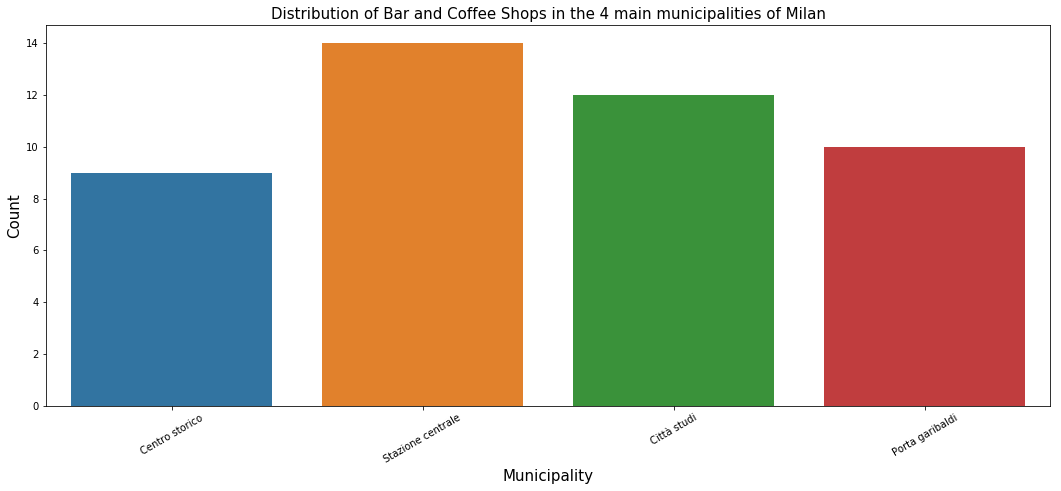

In [136]:
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Name", y="Count", data=df_top4)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('Distribution of Bar and Coffee Shops in the 4 main municipalities of Milan', fontsize=15)
plt.xlabel("Municipality", fontsize=15)
plt.ylabel ("Count", fontsize=15)
plt.savefig("CofeeShop-by-district.png", dpi=300)
plt.show()

(0, 32.719538438999827)

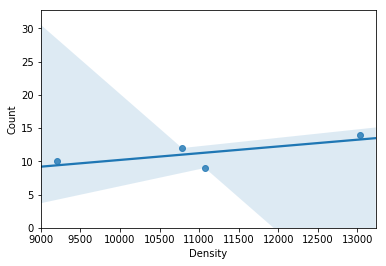

In [139]:

sns.regplot(x="Density", y="Count", data=df_top4)
plt.ylim(0,)